# 1. 선형 시간

In [10]:
import time
import torch
import random           
import numpy as np
import tensorflow as tf

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
def find_max(unordered_list):
    max_value = unordered_list[0]

    for i in range(len(unordered_list)):
        if unordered_list[i] > max_value:
            max_value = unordered_list[i]
    return max_value

In [4]:
list_lengths = [10**exponent for exponent in range(1, 9)]
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]

In [5]:
def timer(func, x):
    start = time.process_time()
    item = func(x)
    end = time.procses_time()
    return item, (end - start)

# GPU/TPU 미사용, 표준 runtime 

In [9]:
list_generation_times = [0.0177079129999953, 0.0004016859999964595, 0.003545889000001523, 0.03795930900000144, 
                         0.36832266399999725, 3.653948464999999, 36.630399178, 365.80881137999995]
find_max_times = [7.259000000203741e-06, 9.917999996389426e-06, 0.00011587499999876627, 0.0008108520000007502, 
                  0.008086421999998095, 0.07195418199999892, 0.7447998319999982, 7.398579237999968]

for length in list_lengths:
    start = time.process_time()
    random_list = [np.random.randint(1, 100) for random_integer in range(length)]
    end = time.process_time()
    list_generation_times.append(end - start)
    print('{:,}개 길이 리스트 생성 소요 시간: {} 초'.format(length, (end-start)))

    start = time.process_time()
    max_value  = find_max(random_list)
    end = time.process_time()
    find_max_times.append(end - start)
    print('{:,}개 길이 리스트에서 최대값을 찾는 시간: {} 초\n'.format(length, (end-start)))

10개 길이 리스트 생성 소요 시간: 0.0177079129999953 초
10개 길이 리스트에서 최대값을 찾는 시간: 7.259000000203741e-06 초

100개 길이 리스트 생성 소요 시간: 0.0004016859999964595 초
100개 길이 리스트에서 최대값을 찾는 시간: 9.917999996389426e-06 초

1,000개 길이 리스트 생성 소요 시간: 0.003545889000001523 초
1,000개 길이 리스트에서 최대값을 찾는 시간: 0.00011587499999876627 초

10,000개 길이 리스트 생성 소요 시간: 0.03795930900000144 초
10,000개 길이 리스트에서 최대값을 찾는 시간: 0.0008108520000007502 초

100,000개 길이 리스트 생성 소요 시간: 0.36832266399999725 초
100,000개 길이 리스트에서 최대값을 찾는 시간: 0.008086421999998095 초

1,000,000개 길이 리스트 생성 소요 시간: 3.653948464999999 초
1,000,000개 길이 리스트에서 최대값을 찾는 시간: 0.07195418199999892 초

10,000,000개 길이 리스트 생성 소요 시간: 36.630399178 초
10,000,000개 길이 리스트에서 최대값을 찾는 시간: 0.7447998319999982 초

100,000,000개 길이 리스트 생성 소요 시간: 365.80881137999995 초
100,000,000개 길이 리스트에서 최대값을 찾는 시간: 7.398579237999968 초



In [19]:
list_generation_times_no_tpu = [0.0177079129999953, 0.0004016859999964595, 0.003545889000001523, 0.03795930900000144, 
                                0.36832266399999725, 3.653948464999999, 36.630399178, 365.80881137999995]
find_max_times_no_tpu = [7.259000000203741e-06, 9.917999996389426e-06, 0.00011587499999876627, 0.0008108520000007502, 
                         0.008086421999998095, 0.07195418199999892, 0.7447998319999982, 7.398579237999968]

In [20]:
linear_no_tpu = pd.DataFrame(list(zip(list_lengths, list_generation_times_no_tpu, find_max_times_no_tpu)), 
                          columns=['length', 'time: generate list', 'time: find max value'])
linear_no_tpu

,length,time: generate list,time: find max value
0,10,0.017708,0.000007
1,100,0.000402,0.000010
2,1000,0.003546,0.000116
3,10000,0.037959,0.000811
4,100000,0.368323,0.008086
5,1000000,3.653948,0.071954
6,10000000,36.630399,0.744800
7,100000000,365.808811,7.398579


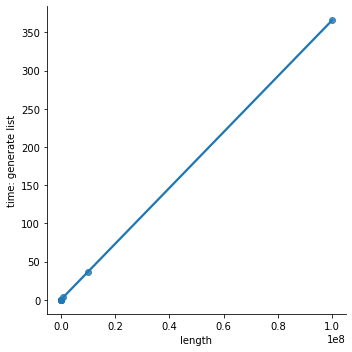

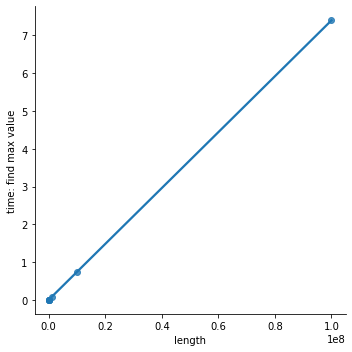

In [22]:
sb.lmplot(x='length', y='time: generate list', data=linear_no_tpu, ci=None)
sb.lmplot(x='length', y='time: find max value', data=linear_no_tpu, ci=None)

# TPU 사용, High RAM

In [6]:
list_generation_times = []
find_max_times = []

for length in list_lengths:
    start = time.process_time()
    random_list = [np.random.randint(1, 100) for random_integer in range(length)]
    end = time.process_time()
    list_generation_times.append(end - start)
    print('{:,}개 길이 리스트 생성 소요 시간: {} 초'.format(length, (end-start)))

    start = time.process_time()
    max_value  = find_max(random_list)
    end = time.process_time()
    find_max_times.append(end - start)
    print('{:,}개 길이 리스트에서 최대값을 찾는 시간: {} 초\n'.format(length, (end-start)))

10개 길이 리스트 생성 소요 시간: 0.0003554759999992996 초
10개 길이 리스트에서 최대값을 찾는 시간: 2.9838999999753923e-05 초

100개 길이 리스트 생성 소요 시간: 0.0009242880000002174 초
100개 길이 리스트에서 최대값을 찾는 시간: 1.682599999952572e-05 초

1,000개 길이 리스트 생성 소요 시간: 0.004227941000001678 초
1,000개 길이 리스트에서 최대값을 찾는 시간: 9.741200000057404e-05 초

10,000개 길이 리스트 생성 소요 시간: 0.032395799000001446 초
10,000개 길이 리스트에서 최대값을 찾는 시간: 0.0006825959999989806 초

100,000개 길이 리스트 생성 소요 시간: 0.30843253599999976 초
100,000개 길이 리스트에서 최대값을 찾는 시간: 0.006918272000000059 초

1,000,000개 길이 리스트 생성 소요 시간: 2.994776012000001 초
1,000,000개 길이 리스트에서 최대값을 찾는 시간: 0.07178054899999964 초

10,000,000개 길이 리스트 생성 소요 시간: 30.203700701 초
10,000,000개 길이 리스트에서 최대값을 찾는 시간: 0.6869037390000017 초

100,000,000개 길이 리스트 생성 소요 시간: 304.109104043 초
100,000,000개 길이 리스트에서 최대값을 찾는 시간: 7.057238466999991 초



In [8]:
linear_tpu = pd.DataFrame(list(zip(list_lengths, list_generation_times, find_max_times)), 
                          columns=['length', 'time: generate list', 'time: find max value'])
linear_tpu

,length,time: generate list,time: find max value
0,10,0.000355,0.000030
1,100,0.000924,0.000017
2,1000,0.004228,0.000097
3,10000,0.032396,0.000683
4,100000,0.308433,0.006918
5,1000000,2.994776,0.071781
6,10000000,30.203701,0.686904
7,100000000,304.109104,7.057238


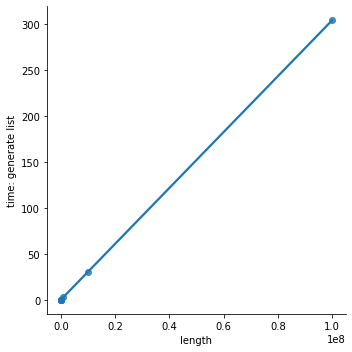

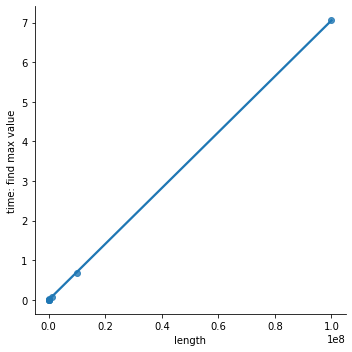

In [18]:
sb.lmplot(x='length', y='time: generate list', data=linear_tpu, ci=None)
sb.lmplot(x='length', y='time: find max value', data=linear_tpu, ci=None)

# 일반 환경 / TPU 환경 선형 시간 비교

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


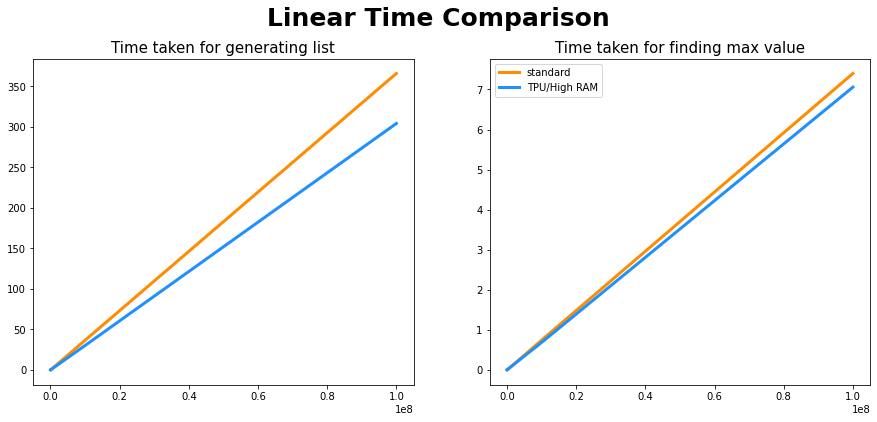

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(list_lengths, list_generation_times_no_tpu, c='darkorange', label='standard', linewidth=3)
ax[0].plot(list_lengths, list_generation_times, c='dodgerblue', label='TPU/High RAM', linewidth=3)
ax[0].set_title("Time taken for generating list", fontsize=15)
ax[1].plot(list_lengths, find_max_times_no_tpu, c='darkorange', label='standard', linewidth=3)
ax[1].plot(list_lengths, find_max_times, c='dodgerblue', label='TPU/High RAM', linewidth=3)
ax[1].set_title("Time taken for finding max value", fontsize=15)
plt.suptitle("Linear Time Comparison", fontsize=25, fontweight='bold', y=1)
plt.legend()

# 중요 함수
- `sns.lmplot(x='n', y='time', data=dataset, ci=None)`
  - lmplot = linear model (regression) plot
  - ci: confidence intreval, 신뢰구간
- `pd.DataFrame(list(zip(list1, list2, ..., list_n)),`
  - list(zip(item1, item2 ... item_n))
- `time.process_time()`